# 直線趨勢線

## 程式實作：以人工方式設定轉折點並繪製直線趨勢線

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2022年9月5日到2023年7月31日的周K線資料 #####
import pandas as pd

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day8.xlsx')

# 保存K棒的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA4','SMA13','MA6','MA12', 'DIF6-12','MACD2','OSC','K(6,3)','D(6,3)'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA6','MA12', 'DIF6-12','MACD2','OSC','K(6,3)','D(6,3)']) 

# 將K棒的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K棒的Date設為Index
df_k_line.set_index(pd.to_datetime(df_k_line['Date'],format='%Y-%m-%d'),inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])
#print(df_k_line)

# 將價的移動平均線的Date設為Index
df_sma.set_index(pd.to_datetime(df_sma['Date'],format='%Y-%m-%d'),inplace=True)
df_sma = df_sma.drop(columns=['Date'])
#print(df_sma)

In [3]:
def date_to_index(df_in,date_in) :
    number_array = df_in.index == date_in
    idx = 0
    for number_index in number_array :
        if number_index == True :
            break
        idx = idx + 1
    return idx

In [4]:
# 人工設定上升趨勢線(藍)
trendline_up1_x = [date_to_index(df_k_line,'2022-10-31'),date_to_index(df_k_line,'2023-05-15')]
trendline_up1_y = [df_k_line.loc['2022-10-31']['Low'],df_k_line.loc['2023-05-15']['Open']]
slope,intercept = np.polyfit(trendline_up1_x,trendline_up1_y,1)
trendline_up1_start_date = '2022-10-24'
trendline_up1_start_price = slope * date_to_index(df_k_line,'2022-10-24') + intercept
trendline_up1_end_date = '2023-07-31'
trendline_up1_end_price = slope * date_to_index(df_k_line,'2023-07-31') + intercept 

# 人工設定上升趨勢線(紅)
trendline_up2_x = [date_to_index(df_k_line,'2023-05-15'),date_to_index(df_k_line,'2023-07-31')]
trendline_up2_y = [df_k_line.loc['2023-05-15']['Low'],df_k_line.loc['2023-07-31']['Low']]
slope,intercept = np.polyfit(trendline_up2_x,trendline_up2_y,1)
trendline_up2_start_date = '2023-05-15'
trendline_up2_start_price = slope * date_to_index(df_k_line,'2023-05-15') + intercept
trendline_up2_end_date = '2023-07-31'
trendline_up2_end_price = slope * date_to_index(df_k_line,'2023-07-31') + intercept 

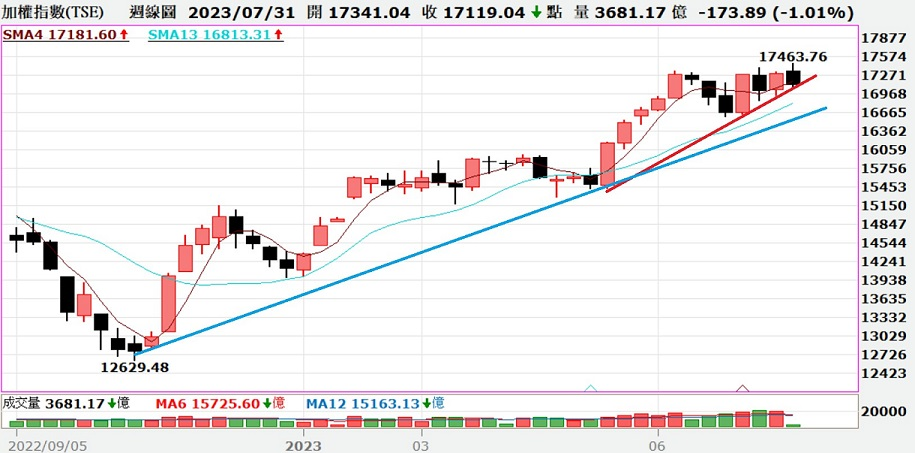

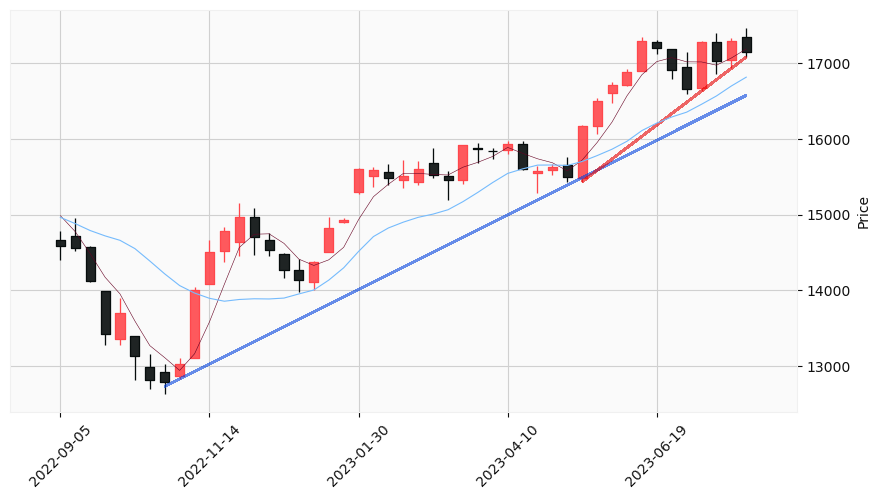

In [5]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定
seq_of_seq_of_points=[
    [(trendline_up1_start_date,trendline_up1_start_price),(trendline_up1_end_date,trendline_up1_end_price)],
    [(trendline_up2_start_date,trendline_up2_start_price),(trendline_up2_end_date,trendline_up2_end_price)]
                     ]

# 設定移動平均線
added_plots={
    "SMA4": mpf.make_addplot(df_sma['SMA4'],width=0.4,color='xkcd:maroon'),
    "SMA13": mpf.make_addplot(df_sma['SMA13'],width=0.8,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=(1.4,1.4), colors=('xkcd:blue','xkcd:red'), alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)